# Exercise 17

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

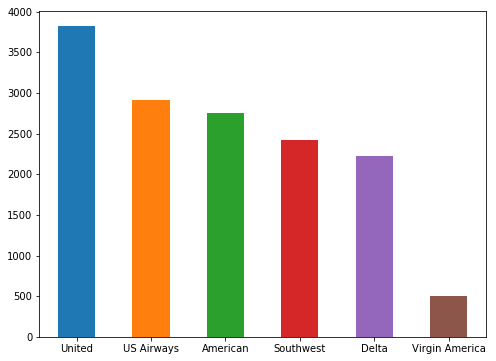

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

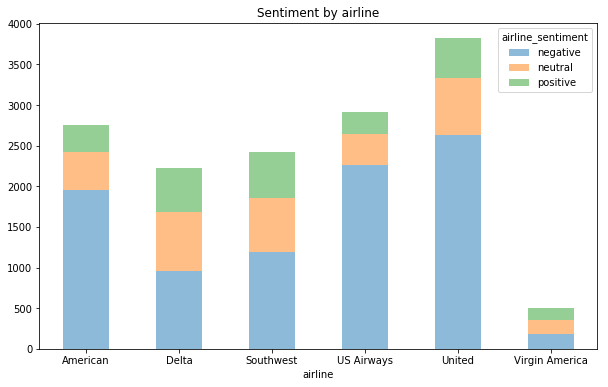

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 17.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

X.shape, y.shape

((14640,), (14640,))

In [9]:
# utilizar cross validation 

vect = CountVectorizer()
X_ = vect.fit_transform(X).toarray()
X_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
X_.shape

(14640, 15051)

In [11]:
vect.get_feature_names()

['00',
 '000',
 '000114',
 '000419',
 '000ft',
 '000lbs',
 '0011',
 '0016',
 '00a',
 '00am',
 '00p',
 '00pm',
 '01',
 '0162389030167',
 '0162424965446',
 '0162431184663',
 '0167560070877',
 '0185',
 '01ldxn3qqq',
 '01pm',
 '02',
 '0200',
 '03',
 '0316',
 '0372389047497',
 '04',
 '0400',
 '04sdytt7zd',
 '05',
 '0510',
 '0530',
 '05am',
 '05pm',
 '06',
 '0600',
 '0638',
 '0671',
 '07',
 '0736',
 '0769',
 '07p',
 '07xhcacjax',
 '08',
 '0985',
 '0_0',
 '0bjnz4eix5',
 '0cevy3p42b',
 '0ewj7oklji',
 '0hmmqczkcf',
 '0hxlnvzknp',
 '0jjt4x3yxg',
 '0jutcdrljl',
 '0kn7pjelzl',
 '0liwecasoe',
 '0pdntgbxc6',
 '0prgysvurm',
 '0wbjawx7xd',
 '0xjared',
 '10',
 '100',
 '1000',
 '1000cost',
 '1001',
 '1002',
 '1007',
 '1008',
 '101',
 '1016',
 '1019',
 '1020',
 '1024',
 '1025',
 '1027',
 '1028',
 '103',
 '1030pm',
 '1032',
 '1038',
 '104',
 '1041',
 '1046',
 '105',
 '1050',
 '1051',
 '1058',
 '106',
 '1065',
 '1071',
 '1074',
 '1079871763',
 '108',
 '1080',
 '1081',
 '1086',
 '108639',
 '1089',
 '1098',


In [12]:
len(vect.get_feature_names())

15051

In [13]:
clf = RandomForestClassifier(random_state=46)
pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()

,0
count,10.000000
mean,0.709560
std,0.031778
min,0.644809
25%,0.698755
50%,0.708573
75%,0.721824
max,0.769809


# Exercise 17.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

____________

Will obtain the Cross Validation for 3 cases:

* Without remote stopwords
* Removing the stopwords with the option `stop_words='english'` implemented in `CountVectorizer`
* Removing the most common words in English


Note: For the 3rd escenario, the *stopwords* were defined as the 20 most common words in English ( [source](https://en.wikipedia.org/wiki/Most_common_words_in_English) )

In [14]:
list_stopwords = {'the','be','to','of','and','a','in','that','have','I',
                  'it','for','not','on','with','he','as','you','do','at'}

With `stop_words=None`

In [15]:
# Actual tokens

vect = CountVectorizer()
print('# of features: ' + str(X_.shape[1]))

Res_n = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_n.rename(columns={0 : 'Base'}, inplace=True)
Res_n

# of features: 15051


,Base
count,10.000000
mean,0.709560
std,0.031778
min,0.644809
25%,0.698755
50%,0.708573
75%,0.721824
max,0.769809


With `stop_words='english'` 

In [16]:
# Using the option 'english' provided by CountVectorizer()

vect = CountVectorizer(stop_words='english')
X_ = vect.fit_transform(X).toarray()

print('# of features: ' + str(X_.shape[1]))

Res_en = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_en.rename(columns={0 : 'English'}, inplace=True)
Res_en

# of features: 14770


,English
count,10.000000
mean,0.693783
std,0.038722
min,0.618852
25%,0.676115
50%,0.693068
75%,0.720501
max,0.754781


With `stop_words=Customized` ... `Customized` is for the 20 most common words in English

In [17]:
# Using the 20 most common words in English
vect = CountVectorizer(stop_words=list_stopwords)

X_ = vect.fit_transform(X).toarray()

print('# of features: ' + str(X_.shape[1]))

Res_p = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_p.rename(columns={0 : 'Custom'}, inplace=True)
Res_p

# of features: 15033


,Custom
count,10.000000
mean,0.715705
std,0.035351
min,0.647541
25%,0.701572
50%,0.720478
75%,0.724044
max,0.787568


* #### Summary

In [18]:
Sum_ = pd.concat([Res_n, Res_en, Res_p], axis=1, sort=False)
Sum_

,Base,English,Custom
count,10.000000,10.000000,10.000000
mean,0.709560,0.693783,0.715705
std,0.031778,0.038722,0.035351
min,0.644809,0.618852,0.647541
25%,0.698755,0.676115,0.701572
50%,0.708573,0.693068,0.720478
75%,0.721824,0.720501,0.724044
max,0.769809,0.754781,0.787568


# Exercise 17.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

__________

With `stop_words=None & ngram_range=(1, 1)`

In [19]:
vect = CountVectorizer(ngram_range=(1, 1))

print('ngrams between 1-1 & NO stopwords')

X_ = vect.fit_transform(X).toarray()

print('# of features: ' + str(X_.shape[1]))

Res_n_1_1 = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_n_1_1.rename(columns={0 : 'Base_ngrams_1_1'}, inplace=True)
Res_n_1_1.loc['features'] = int(X_.shape[1])
Res_n_1_1

ngrams between 1-1 & NO stopwords
# of features: 15051


,Base_ngrams_1_1
count,10.000000
mean,0.709560
std,0.031778
min,0.644809
25%,0.698755
50%,0.708573
75%,0.721824
max,0.769809
features,15051.000000


With `stop_words=None & ngram_range=(1, 2)`

In [20]:
vect = CountVectorizer(ngram_range=(1, 2))

print('ngrams between 1-2 & NO stopwords')

X_ = vect.fit_transform(X).toarray()
print('# of features: ' + str(X_.shape[1]))

ngrams between 1-2 & NO stopwords
# of features: 117630


In [21]:
Res_n_1_2 = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_n_1_2.rename(columns={0 : 'Base_ngrams_1_2'}, inplace=True)
Res_n_1_2.loc['features'] = int(X_.shape[1])
Res_n_1_2

,Base_ngrams_1_2
count,10.000000
mean,0.710450
std,0.021817
min,0.668033
25%,0.704778
50%,0.709841
75%,0.715896
max,0.754781
features,117630.000000


In [22]:
vect = CountVectorizer(ngram_range=(1, 3), max_features=120000)

print('ngrams between 1-3 & NO stopwords')

X_ = vect.fit_transform(X).toarray()
print('# of features: ' + str(X_.shape[1]))

ngrams between 1-3 & NO stopwords
# of features: 120000


In [23]:
Res_n_1_3 = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_n_1_3.rename(columns={0 : 'Base_ngrams_1_3'}, inplace=True)
Res_n_1_3.loc['features'] = int(X_.shape[1])
Res_n_1_3

,Base_ngrams_1_3
count,10.000000
mean,0.710174
std,0.026857
min,0.657104
25%,0.700888
50%,0.713896
75%,0.720164
max,0.762295
features,120000.000000


With `stop_words='english' & ngram_range=(1, 1)`

In [24]:
vect = CountVectorizer(stop_words='english', ngram_range=(1, 1))

print('ngrams between 1-1 & stopwords=English')

X_ = vect.fit_transform(X).toarray()
print('# of features: ' + str(X_.shape[1]))

ngrams between 1-1 & stopwords=English
# of features: 14770


In [25]:
Res_en_1_1 = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_en_1_1.rename(columns={0 : 'English_ngrams_1_1'}, inplace=True)
Res_en_1_1.loc['features'] = int(X_.shape[1])
Res_en_1_1

,English_ngrams_1_1
count,10.000000
mean,0.693783
std,0.038722
min,0.618852
25%,0.676115
50%,0.693068
75%,0.720501
max,0.754781
features,14770.000000


With `stop_words='english' & ngram_range=(1, 2)`

In [26]:
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))

print('ngrams between 1-2 & stopwords=English')

X_ = vect.fit_transform(X).toarray()
print('# of features: ' + str(X_.shape[1]))

ngrams between 1-2 & stopwords=English
# of features: 100073


In [27]:
Res_en_1_2 = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_en_1_2.rename(columns={0 : 'English_ngrams_1_2'}, inplace=True)
Res_en_1_2.loc['features'] = int(X_.shape[1])
Res_en_1_2

,English_ngrams_1_2
count,10.000000
mean,0.693644
std,0.044314
min,0.599044
25%,0.678787
50%,0.701643
75%,0.717065
max,0.762295
features,100073.000000


With `stop_words='english' & ngram_range=(1, 3)`

In [28]:
vect = CountVectorizer(stop_words='english', ngram_range=(1, 3), max_features=120000)

print('ngrams between 1-2 & stopwords=English')

X_ = vect.fit_transform(X).toarray()
print('# of features: ' + str(X_.shape[1]))

ngrams between 1-2 & stopwords=English
# of features: 120000


In [29]:
Res_en_1_3 = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_en_1_3.rename(columns={0 : 'English_ngrams_1_3'}, inplace=True)
Res_en_1_3.loc['features'] = int(X_.shape[1])
Res_en_1_3

,English_ngrams_1_3
count,10.000000
mean,0.694186
std,0.057479
min,0.568306
25%,0.677136
50%,0.702318
75%,0.725115
max,0.782787
features,120000.000000


With `stop_words='Customized' & ngram_range=(1, 1)`

In [30]:
vect = CountVectorizer(stop_words=list_stopwords, ngram_range=(1, 1))

print('ngrams between 1-1 & stopwords=Customized')

X_ = vect.fit_transform(X).toarray()
print('# of features: ' + str(X_.shape[1]))

ngrams between 1-1 & stopwords=Customized
# of features: 15033


In [31]:
Res_p_1_1 = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_p_1_1.rename(columns={0 : 'Custom_ngrams_1_1'}, inplace=True)
Res_p_1_1.loc['features'] = int(X_.shape[1])
Res_p_1_1

,Custom_ngrams_1_1
count,10.000000
mean,0.715705
std,0.035351
min,0.647541
25%,0.701572
50%,0.720478
75%,0.724044
max,0.787568
features,15033.000000


With `stop_words='Customized' & ngram_range=(1, 2)`

In [32]:
vect = CountVectorizer(stop_words=list_stopwords, ngram_range=(1, 2))

print('ngrams between 1-2 & stopwords=Customized')

X_ = vect.fit_transform(X).toarray()
print('# of features: ' + str(X_.shape[1]))

ngrams between 1-2 & stopwords=Customized
# of features: 119854


In [33]:
Res_p_1_2 = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_p_1_2.rename(columns={0 : 'Custom_ngrams_1_2'}, inplace=True)
Res_p_1_2.loc['features'] = int(X_.shape[1])
Res_p_1_2

,Custom_ngrams_1_2
count,10.000000
mean,0.713043
std,0.037573
min,0.633197
25%,0.712651
50%,0.713358
75%,0.726605
max,0.781421
features,119854.000000


With `stop_words='Customized' & ngram_range=(1, 3)`

In [34]:
vect = CountVectorizer(stop_words=list_stopwords, ngram_range=(1, 3), max_features=120000)

print('ngrams between 1-2 & stopwords=Customized')

X_ = vect.fit_transform(X).toarray()
print('# of features: ' + str(X_.shape[1]))

ngrams between 1-2 & stopwords=Customized
# of features: 120000


In [35]:
Res_p_1_3 = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_p_1_3.rename(columns={0 : 'Custom_ngrams_1_3'}, inplace=True)
Res_p_1_3.loc['features'] = int(X_.shape[1])
Res_p_1_3

,Custom_ngrams_1_3
count,10.000000
mean,0.717347
std,0.033956
min,0.658470
25%,0.708082
50%,0.717651
75%,0.719822
max,0.795765
features,120000.000000


In [36]:
Sum_3 = pd.concat([Res_n_1_1, Res_n_1_2, Res_n_1_3, 
                   Res_en_1_1, Res_en_1_2, Res_en_1_3, 
                   Res_p_1_1, Res_p_1_2, Res_p_1_3], 
                  axis=1, sort=False)
Sum_3

,Base_ngrams_1_1,Base_ngrams_1_2,Base_ngrams_1_3,English_ngrams_1_1,English_ngrams_1_2,English_ngrams_1_3,Custom_ngrams_1_1,Custom_ngrams_1_2,Custom_ngrams_1_3
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.709560,0.710450,0.710174,0.693783,0.693644,0.694186,0.715705,0.713043,0.717347
std,0.031778,0.021817,0.026857,0.038722,0.044314,0.057479,0.035351,0.037573,0.033956
min,0.644809,0.668033,0.657104,0.618852,0.599044,0.568306,0.647541,0.633197,0.658470
25%,0.698755,0.704778,0.700888,0.676115,0.678787,0.677136,0.701572,0.712651,0.708082
50%,0.708573,0.709841,0.713896,0.693068,0.701643,0.702318,0.720478,0.713358,0.717651
75%,0.721824,0.715896,0.720164,0.720501,0.717065,0.725115,0.724044,0.726605,0.719822
max,0.769809,0.754781,0.762295,0.754781,0.762295,0.782787,0.787568,0.781421,0.795765
features,15051.000000,117630.000000,120000.000000,14770.000000,100073.000000,120000.000000,15033.000000,119854.000000,120000.000000


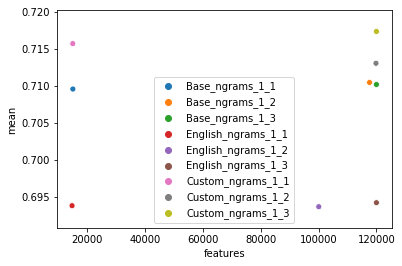

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(y='mean',
                x='features',
                hue=Sum_3.columns.values,
                data=Sum_3.T)
plt.show()

The best is **Custom** (aka removing the 20 most common words in English) with `ngram_range=(1, 1)`!

# Exercise 17.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [38]:
vect = TfidfVectorizer()
X_ = vect.fit_transform(X)

Res_TV_n = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_TV_n.rename(columns={0 : 'Base_TfidfV'}, inplace=True)
Res_TV_n.loc['features'] = int(X_.shape[1])
Res_TV_n

,Base_TfidfV
count,10.000000
mean,0.706691
std,0.018783
min,0.677596
25%,0.698341
50%,0.702288
75%,0.719063
max,0.742486
features,15051.000000


In [39]:
vect = TfidfVectorizer(stop_words='english')
X_ = vect.fit_transform(X)

Res_TV_en = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_TV_en.rename(columns={0 : 'English_TfidfV'}, inplace=True)
Res_TV_en.loc['features'] = int(X_.shape[1])
Res_TV_en

,English_TfidfV
count,10.000000
mean,0.688794
std,0.045605
min,0.579235
25%,0.670476
50%,0.704371
75%,0.713823
max,0.734290
features,14770.000000


In [40]:
vect = TfidfVectorizer(stop_words=list_stopwords)
X_ = vect.fit_transform(X)

Res_TV_p = pd.DataFrame(cross_val_score(clf, X_, y, cv=10)).describe()
Res_TV_p.rename(columns={0 : 'Custom_TfidfV'}, inplace=True)
Res_TV_p.loc['features'] = int(X_.shape[1])
Res_TV_p

,Custom_TfidfV
count,10.000000
mean,0.708943
std,0.025843
min,0.670082
25%,0.694529
50%,0.706387
75%,0.723379
max,0.761612
features,15033.000000


In [41]:
Sum_4 = pd.concat([Sum_3, Res_TV_n, Res_TV_en, Res_TV_p], axis=1, sort=False)
Sum_4

,Base_ngrams_1_1,Base_ngrams_1_2,Base_ngrams_1_3,English_ngrams_1_1,English_ngrams_1_2,English_ngrams_1_3,Custom_ngrams_1_1,Custom_ngrams_1_2,Custom_ngrams_1_3,Base_TfidfV,English_TfidfV,Custom_TfidfV
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.709560,0.710450,0.710174,0.693783,0.693644,0.694186,0.715705,0.713043,0.717347,0.706691,0.688794,0.708943
std,0.031778,0.021817,0.026857,0.038722,0.044314,0.057479,0.035351,0.037573,0.033956,0.018783,0.045605,0.025843
min,0.644809,0.668033,0.657104,0.618852,0.599044,0.568306,0.647541,0.633197,0.658470,0.677596,0.579235,0.670082
25%,0.698755,0.704778,0.700888,0.676115,0.678787,0.677136,0.701572,0.712651,0.708082,0.698341,0.670476,0.694529
50%,0.708573,0.709841,0.713896,0.693068,0.701643,0.702318,0.720478,0.713358,0.717651,0.702288,0.704371,0.706387
75%,0.721824,0.715896,0.720164,0.720501,0.717065,0.725115,0.724044,0.726605,0.719822,0.719063,0.713823,0.723379
max,0.769809,0.754781,0.762295,0.754781,0.762295,0.782787,0.787568,0.781421,0.795765,0.742486,0.734290,0.761612
features,15051.000000,117630.000000,120000.000000,14770.000000,100073.000000,120000.000000,15033.000000,119854.000000,120000.000000,15051.000000,14770.000000,15033.000000


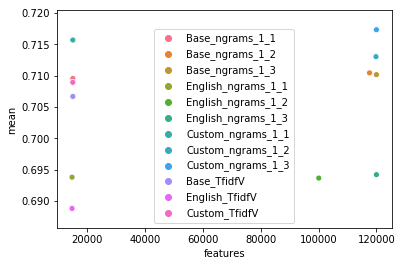

In [42]:
sns.scatterplot(y='mean',
                x='features',
                hue=Sum_4.columns.values,
                data=Sum_4.T)
plt.show()